In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('exchange_rate.csv',index_col=0)
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [6]:
df.isna().sum()

Ex_rate    0
dtype: int64

In [7]:
df.duplicated().sum()

2258

In [8]:
df.index = pd.to_datetime(df.index,format='%d-%m-%Y %H:%M')
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


<Figure size 1000x1000 with 0 Axes>

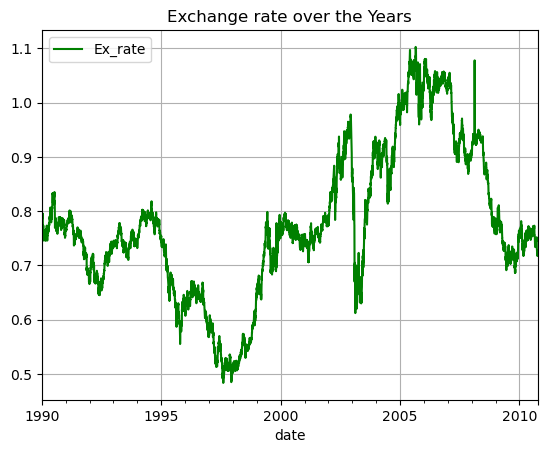

In [9]:
plt.figure(figsize=(10,10))
df.plot(color='green')
plt.title('Exchange rate over the Years')
plt.grid(True)
plt.show()

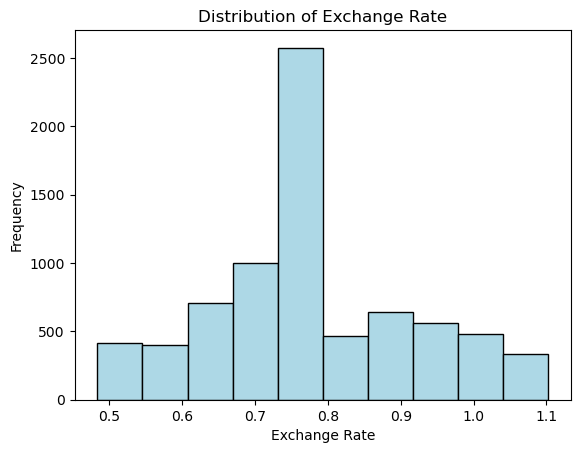

In [10]:
plt.hist(df,color='lightblue',edgecolor='black')
plt.title('Distribution of Exchange Rate')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()

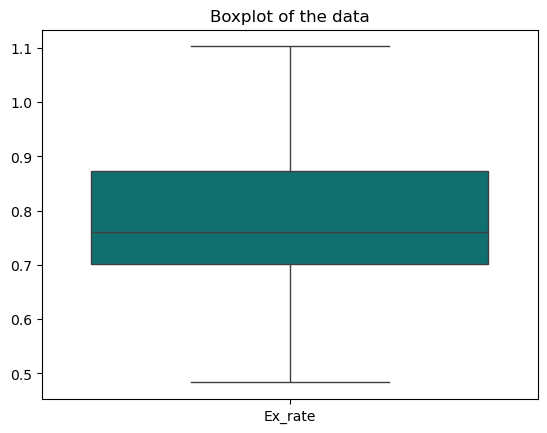

In [11]:
sns.boxplot(df,color='teal')
plt.title('Boxplot of the data')
plt.show()

In [12]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


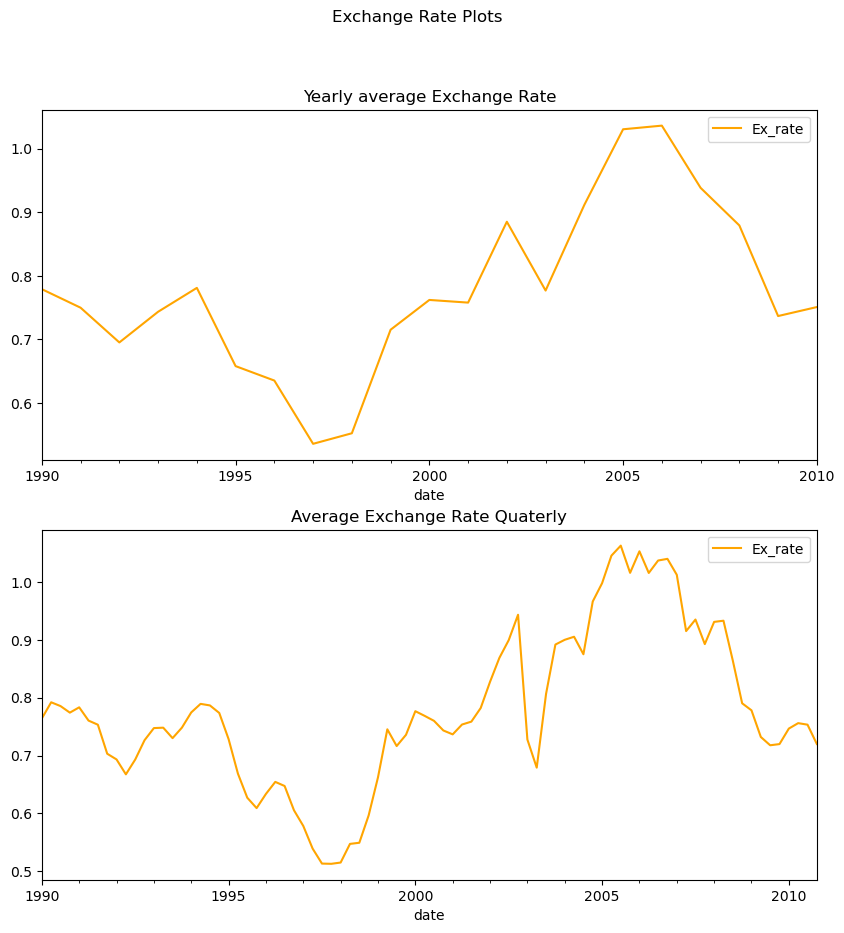

In [30]:
df_average_yearly = df.resample('A').mean()
fig,axes = plt.subplots(2,1,figsize=(10,10))
df_average_yearly.plot(color='orange',ax=axes[0])
axes[0].set_title('Yearly average Exchange Rate')


df_average_quaterly = df.resample('Q').mean()
df_average_quaterly.plot(color='orange',ax=axes[1])
axes[1].set_title('Average Exchange Rate Quaterly')

plt.suptitle('Exchange Rate Plots')
plt.show()

# Lets build an ARIMA model for forecasting.

In [46]:
df_train = df.head(6070)
df_test = df.tail(1518)

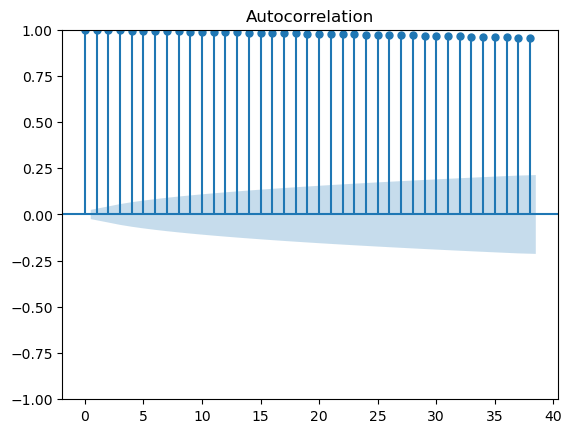

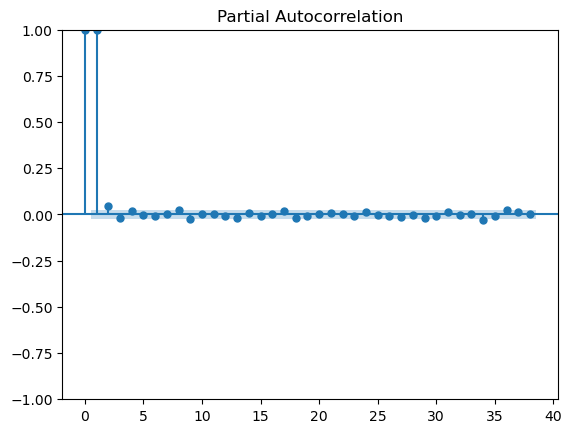

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_train = plot_acf(df_train)

pacf_train = plot_pacf(df_train)

all lag points are significant in acf plot.

2 lag points are significant in pacf plot. (AR(2) model)

 ADF test

In [52]:
# ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f"pvalue: {adf_test[1]}")

pvalue: 0.7601827946372048


<Axes: xlabel='date'>

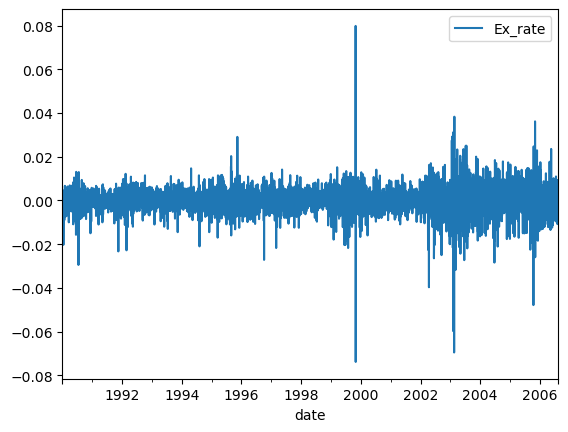

In [54]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

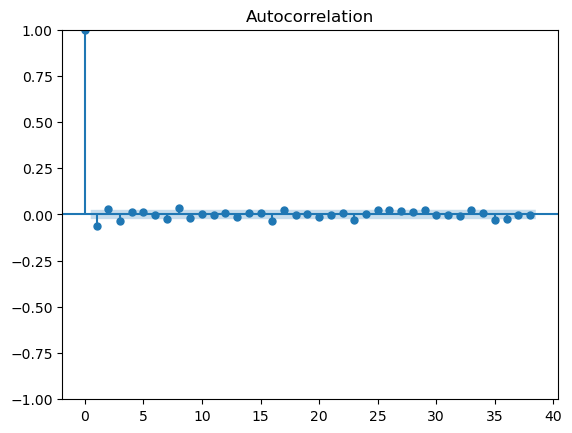

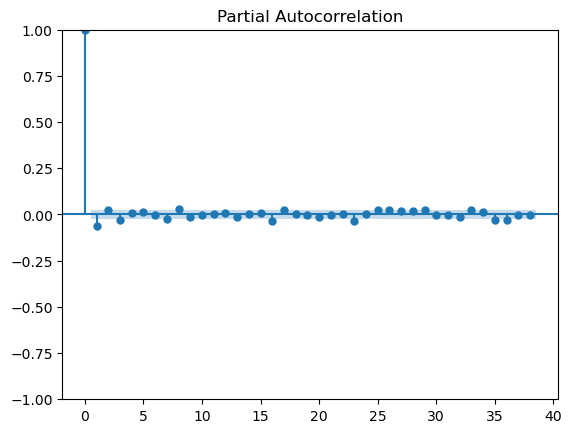

In [58]:
acf_train = plot_acf(df_train_diff)

pacf_train = plot_pacf(df_train_diff)

In [60]:
adf_test_diff = adfuller(df_train_diff)
print(f"pvalue: {adf_test_diff[1]}")

pvalue: 0.0


# ARIMA Model

In [374]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order = (6,1,6)) 
fitted_model=model.fit()
print(fitted_model.summary())

C:\Users\saich\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\saich\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\saich\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(6, 1, 6)   Log Likelihood               22724.971
Date:                Tue, 17 Jun 2025   AIC                         -45423.941
Time:                        11:30:12   BIC                         -45336.699
Sample:                    01-01-1990   HQIC                        -45393.662
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8156      1.368     -0.596      0.551      -3.497       1.866
ar.L2         -0.6907      1.978     -0.349      0.727      -4.567       3.185
ar.L3         -0.4405      1.963     -0.224      0.8

<Axes: title={'center': 'Residuals'}, xlabel='date'>

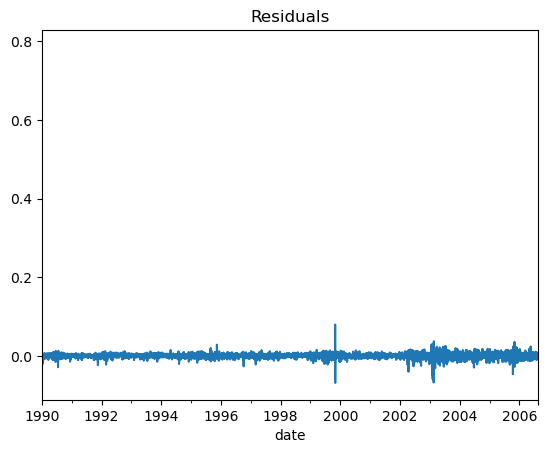

In [375]:
# Residuals 
residuals = fitted_model.resid
residuals.plot(title='Residuals')

the residual looks random and general.

<Axes: title={'center': 'Density'}, ylabel='Density'>

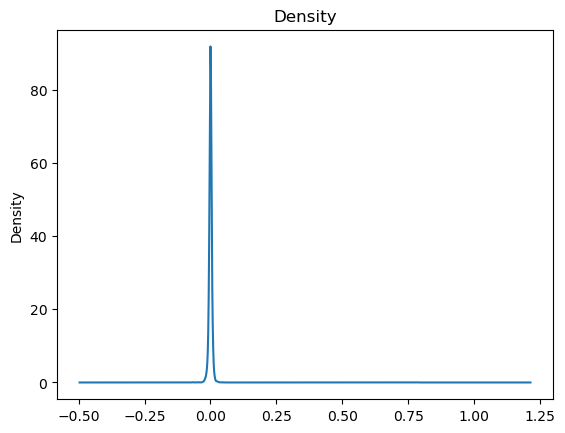

In [377]:
residuals.plot(title='Density',kind='kde')

The density looks normally distributed with mean around 0.

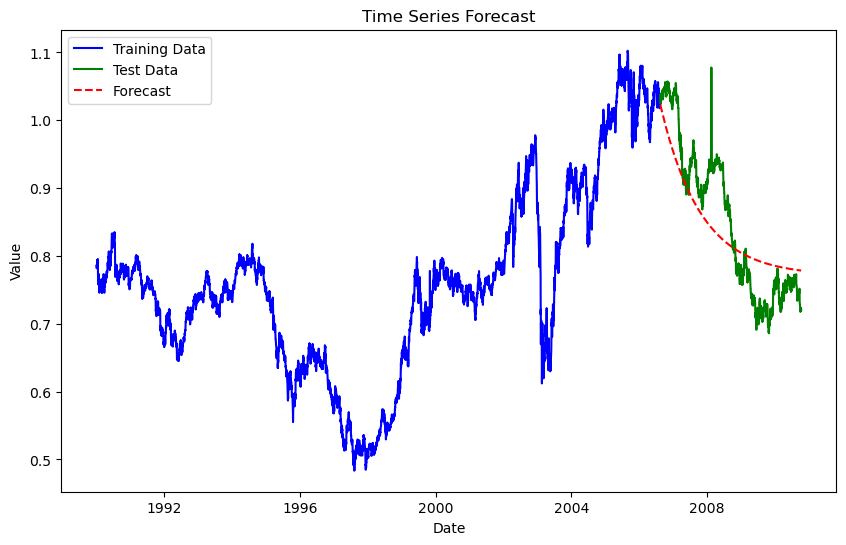

In [379]:
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train['Ex_rate'], label='Training Data', color='blue')

# Plot test data
plt.plot(df_test.index, df_test['Ex_rate'], label='Test Data', color='green')

# Plot forecasted data
plt.plot(df_test.index, forecast_test, label='Forecast', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecast')

# Add legend
plt.legend()

# Show plot
plt.show()

# We can see that our model is forecasting test data really good.

In [381]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
mse = mean_squared_error(df_test, forecast_test)
print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'mse: {mse}')

mae: 0.050757503172404746
mape: 0.05981469482420825
mse: 0.0034764544235260765


 As we can see our model is performing really well.

 Lets Holt-Winters Exponential Smoothing for this model 

In [417]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df_train, 
                             trend='add', 
                             seasonal='add', 
                             seasonal_periods=12)  # adjust to your data frequency
model_fit = model.fit()

C:\Users\saich\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


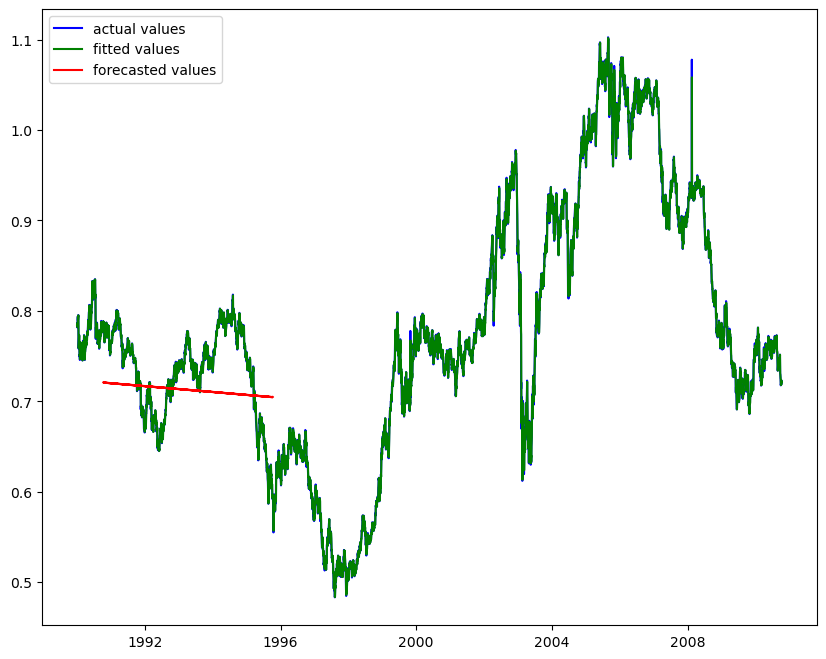

In [462]:
forecast=model_holt.forecast(1825)
plt.figure(figsize=(10,8))
plt.plot(df['Ex_rate'],label="actual values",color='blue')
plt.plot(model_holt.fittedvalues,label='fitted values',color='green')
plt.plot(range(len(df),len(df)+1825),forecast,label='forecasted values',color='red')
plt.legend()
plt.show()

In [445]:
rmse=np.sqrt(np.mean(model_fit.resid**2))
print("Root Mean Square error=",rmse)
print()

Root Mean Square error= 0.0057341923717744115



In [455]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
simple=SimpleExpSmoothing(df_train).fit(optimized=True)
simple_forecast=simple.forecast(len(df_test))

from sklearn.metrics import mean_squared_error,mean_absolute_error

mae = mean_absolute_error(df_test, simple_forecast)
rmse = np.sqrt(mean_squared_error(df_test, simple_forecast))

print("Model Evaluation:")
print(f"Simple Exponential Smoothing \n- MAE: {mae}\n -RMSE: {rmse}\n ")

Model Evaluation:
Simple Exponential Smoothing 
- MAE: 0.17763811683047734
 -RMSE: 0.20535637717674138
 


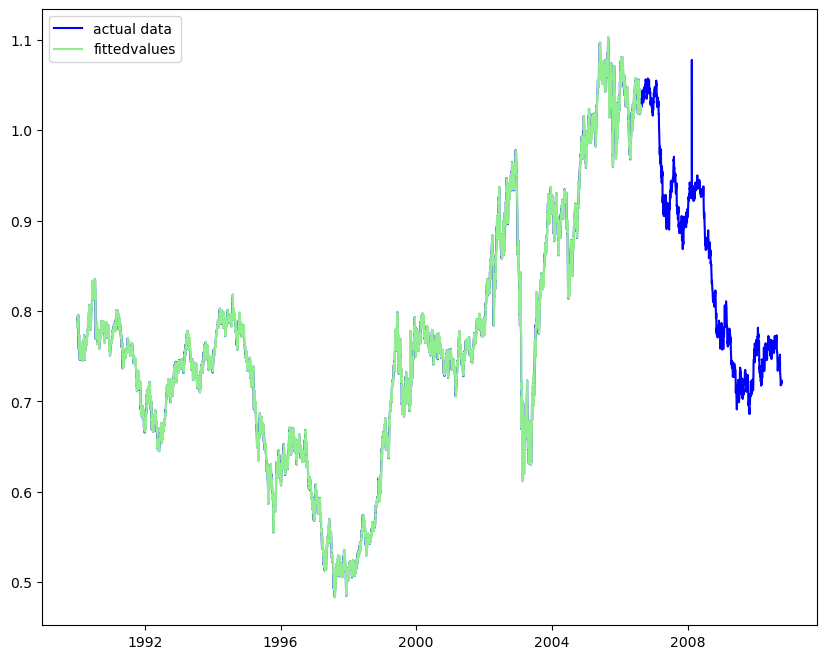

In [459]:
plt.figure(figsize=(10,8))
plt.plot(df["Ex_rate"],label="actual data",color='blue')
plt.plot(model_fit.fittedvalues,label="fittedvalues",color='lightgreen')


plt.legend()
plt.show()

# Evaluation